# Correlation


```{note}
This chapter is adapted from Matthew Crump's excellent [Answering questions with data](https://crumplab.github.io/statistics/) book.  The main text has mainly be left intact with a few modifications, also the code adapted to use python and jupyter.
```


>"Correlation does not equal causation." ---Every statistics and research methods instructor ever




In [2]:
from IPython.core.display import HTML, Markdown, display

import numpy.random as npr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

class Caption:
    def __init__(self, fig_no, text, c_type='f'):
        self.fig_no = fig_no
        self.text = text
        if c_type=='t':
            self.c_type = 'Table'
        else:
            self.c_type = 'Figure'
    
    def _repr_html_(self):
        return f"<div class=\"alert alert-info\" role=\"alert\"><b>{ self.c_type } { self.fig_no }</b>. { self.text }</div>"

In the previous chapters we had some data. It was too much too look at and it didn't make sense. So, we talked about how to look at the data visually using plots and histograms, and we talked about how to summarize lots of numbers so we could determine their central tendencies (sameness) and variability (differentness). And, all was well with the world.

Let's not forget the big reason why we learned about descriptive statistics. The big reason is that we are interested in getting answers to questions using data. 

If you are looking for a big theme to think about while you take this course, the theme is: how do we ask and answer questions using data? 

For every section in this book, you should be connecting your inner monologue to this question, and asking yourself: How does what I am learning about help me answer questions with data? Advance warning: we know it is easy to forget this stuff when we dive into the details, and we will try to throw you a rope to help you out along the way...remember, we're trying to answer questions with data.

We started Chapter two with some fake data on human happiness, remember? We imagined that we asked a bunch of people to tell us how happy they were, then we looked at the numbers they gave us. Let's continue with this imaginary thought experiment.

What do you get when you ask people to use a number to describe how happy they are? A bunch of numbers. What kind of questions can you ask about those numbers? Well, you can look at the numbers and estimate their general properties as we already did. We would expect those numbers tell us some things we already know. There are different people, and different people are different amounts of happy. You've probably met some of those of really happy people, and really unhappy people, and you yourself probably have some amount of happiness. "Great, thanks Captain Obvious". 

Before moving on, you should also be skeptical of what the numbers might mean. For example, if you force people to give a number between 0-100 to rate their happiness, does this number truly reflect how happy that person is? Can a person know how happy they are? Does the question format bias how they give their answer? Is happiness even a real thing? These are all good questions about the **validity** of the construct (happiness itself) and the measure (numbers) you are using to quantify it. For now, though, we will side-step those very important questions, and assume that, happiness is a thing, and our measure of happiness measures something about how happy people are.

OK then, after we have measured some happiness, I bet you can think of some more pressing questions. For example, what causes happiness to go up or down. If you knew the causes of happiness what could you do? How about increase your own happiness; or, help people who are unhappy; or, better appreciate why Eeyore from Winnie the Pooh is unhappy; or, present valid scientific arguments that argue against incorrect claims about what causes happiness. A causal theory and understanding of happiness could be used for all of those things. How can we get there?

Imagine you were an alien observer. You arrived on earth and heard about this thing called happiness that people have. You want to know what causes happiness. You also discover that planet earth has lots of other things. Which of those things, you wonder, cause happiness? How would your alien-self get started on this big question.

As a person who has happiness, you might already have some hunches about what causes changes in happiness. For example things like: weather, friends, music, money, education, drugs, books, movies, belieifs, personality, color of your shoes, eyebrow length, number of cat's you see per day, frequency of subway delay, a lifetime supply of chocolate, etcetera etcetera (as Willy Wonka would say), might all contribute to happiness in someway. There could be many different causes of happiness.

## If something caused something else to change, what would that look like?

Before we go around determining the causes of happiness, we should prepare ourselves with some analytical tools so that we could identify what causation looks like. If we don't prepare ourselves for what we might find, then we won't know how to interpret our own data. Instead, we need to anticipate what the data could look like. Specifically, we need to know what data would look like when one thing does not cause another thing, and what data would look like when one thing does cause another thing. This chapter does some of this preparation. Fair warning: we will find out some tricky things. For example, we can find patterns that look like one thing is causing another, even when that one thing DOES NOT CAUSE the other thing. Hang in there.

### Charlie and the Chocolate factory

Let's imagine that a person's supply of chocolate has a causal influence on their level of happiness. Let's further imagine that, like Charlie, the more chocolate you have the more happy you will be, and the less chocolate you have, the less happy you will be. Finally, because we suspect happiness is caused by lots of other things in a person's life, we anticipate that the relationship between chocolate supply and happiness won't be perfect. What do these assumptions mean for how the data should look?

Our first step is to collect some imaginary data from 100 people. We walk around and ask the first 100 people we meet to answer two questions: 

1. how much chocolate do you have, and 
2. how happy are you. 

For convenience, both the scales will go from 0 to 100. For the chocolate scale, 0 means no chocolate, 100 means lifetime supply of chocolate. Any other number is somewhere in between. For the happiness scale, 0 means no happiness, 100 means all of the happiness, and in between means some amount in between.

Here is some sample data from the first 10 imaginary subjects.

In [5]:
subject=np.arange(1,101)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
df_CC= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness}).set_index('subject')

display(Caption(1, "Measurements of amount of chocolate consumed and happiness (hypothetical only).", 't'))
df_CC.head()

,chocolate,happiness
subject,,
1,0.0,0.0
2,1.0,1.0
3,2.0,2.0
4,2.0,2.0
5,4.0,2.0


We asked each subject two questions so there are two scores for each subject, one for their chocolate supply, and one for their level of happiness. You might already notice some relationships between amount of chocolate and level of happiness in the table. To make those relationships even more clear, let's plot all of the data in a graph.

### Scatter plots

When you have two measurements worth of data, you can always turn them into dots and plot them in a scatter plot. A scatter plot has a horizontal x-axis, and a vertical y-axis. You get to choose which measurement goes on which axis. Let's put chocolate supply on the x-axis, and happiness level on the y-axis. The plot below shows 100 dots for each subject.

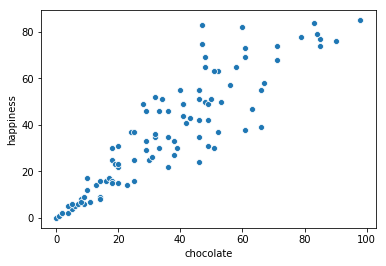

In [6]:
sns.scatterplot(x='chocolate', y='happiness', data=df_CC)
plt.show()
display(Caption(1.0, "Imaginary data showing a positive correlation between amount of chocolate and amount happiness"))

You might be wondering, why are there only 100 dots for the data. Didn't we collect 100 measures for chocolate, and 100 measures for happiness, shouldn't there be 200 dots? Nope. Each dot is for one subject, there are 100 subjects, so there are 100 dots. 

What do the dots mean? Each dot has two coordinates, an x-coordinate for chocolate, and a y-coordinate for happiness. The first dot, all the way on the bottom left is the first subject in the table, who had close to 0 chocolate and close to zero happiness. You can look at any dot, then draw a straight line down to the x-axis: that will tell you how much chocolate that subject has. You can draw a straight line left to the y-axis: that will tell you how much happiness the subject has.

Now that we are looking at the scatter plot, we can see many things. The dots are scattered around a bit aren't they, hence **scatter plot**. Even when the dot's don't scatter, they're still called scatter plots, perhaps because those pesky dots in real life have so much scatter all the time. More important, the dots show a relationship between chocolate supply and happiness. Happiness is lower for people with smaller supplies of chocolate, and higher for people with larger supplies of chocolate. It looks like the more chocolate you have the happier you will be, and vice-versa. This kind of relationship is called a **positive correlation**. 

### Positive, Negative, and No-Correlation

Seeing as we are in the business of imagining data, let's imagine some more. We've already imagined what data would look like if larger chocolate supplies increase happiness. We'll show that again in a bit. What do you imagine the scatter plot would look like if the relationship was reversed, and larger chocolate supplies decreased happiness. Or, what do you imagine the scatter plot would look like if there was no relationship, and the amount of chocolate that you have doesn't do anything to your happiness. We invite your imagination to look at these graphs:

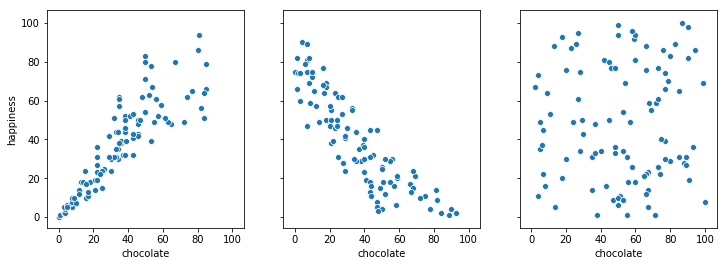

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4),sharex='all', sharey='all')
ax = axes.ravel()


subject=np.arange(100)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
df_CC_pos= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.scatterplot(x='chocolate', y='happiness', data=df_CC_pos,ax=ax[0])


subject=np.arange(100)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100,0,-1)*npr.uniform(0.5, 1, 100))
df_CC_neg= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.scatterplot(x='chocolate', y='happiness', data=df_CC_neg,ax=ax[1])


subject=np.arange(100)
chocolate=np.round(npr.uniform(0, 100, 100))
happiness=np.round(npr.uniform(0, 100, 100))
df_CC_zero= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.scatterplot(x='chocolate', y='happiness', data=df_CC_zero,ax=ax[2])

plt.show()
display(Caption(2.0, "Three scatterplots showing positive, negative, and zero correlation"))

The first panel shows a **negative correlation**. Happiness goes down as chocolate supply increases. Negative correlation occurs when one thing goes up and the other thing goes down; or, when more of X is less of Y, and vice-versa. The second panel shows a **positive correlation**. Happiness goes up as chocolate as chocolate supply increases. Positive correlation occurs when both things go up together, and go down together: more of X is more of Y, and vice-versa. The third panel shows **no correlation**. Here, there doesn't appear to be any obvious relationship between chocolate supply and happiness. The dots are scattered all over the place, the truest of the scatter plots. 


<div class="marginnote">
We are wading into the idea that measures of two things can be related, or correlated with one another. It is possible for the relationships to be more complicated than just going up, or going down. For example, we could have a relationship that where the dots go up for the first half of X, and then go down for the second half.
</div>

Zero correlation occurs when one thing is not related in any way to another things: changes in X do not relate to any changes in Y, and vice-versa.

## Pearson's r

If Beyoncé was a statistician, she might look at these scatter plots and want to "put a number on it". We think this is a good idea too. We've already learned how to create descriptive statistics for a single measure, like chocolate, or happiness (i.e., means, variances, etc.). Is it possible to create a descriptive statistic that summarized the relationship between two measures, all in one number? Can it be done? Karl Pearson to the rescue.

<div class="marginnote">
The stories about the invention of various statistics are very interesting, you can read more about them in the book, "The Lady Tasting Tea" [@salsburg2001lady]
</div>

There's a statistic for that, and Karl Pearson invented it. Everyone now calls it, "Pearson's $r$". We will find out later that Karl Pearson was a big-wig editor at Biometrika in the 1930s. He took a hating to another big-wig statistician, Sir Ronald Fisher (who we learn about later), and they had some stats fights...why can't we all just get along in statistics.

How does Pearson's $r$ work? Let's look again at the first 10 subjects in our fake experiment:

In [94]:
df=df_CC.loc[0:10].copy()
m,s = df.mean(), df.sum()
df.loc["Sums"] = s
df.loc["Means"] = m

df

,chocolate,happiness
subject,,
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,3.0,2.0
5,3.0,3.0
6,4.0,5.0
7,4.0,4.0
8,4.0,6.0
9,7.0,6.0


What could we do to these numbers to produce a single summary value that represents the relationship between the chocolate supply and happiness?

### The idea of co-variance

"Oh please no, don't use the word variance again". Yes, we're doing it, we're going to use the word variance again, and again, until it starts making sense. Remember what variance means about some numbers. It means the numbers have some change in them, they are not all the same, some of them are big, some are small. We can see that there is variance in chocolate supply across the 10 subjects. We can see that there is variance in happiness across the 10 subjects. We also saw in the scatter plot, that happiness increases as chocolate supply increases; which is a positive relationship, a positive correlation. What does this have to do with variance? Well, it means there is a relationship between the variance in chocolate supply, and the variance in happiness levels. The two measures vary together don't they? When we have two measures that vary together, they are like a happy couple who share their variance. This is what co-variance refers to, the idea that the pattern of varying numbers in one measure is shared by the pattern of varying numbers in another measure. 

**Co-variance** is **very, very, very ,very** important. We suspect that the word co-variance is initially confusing, especially if you are not yet fully comfortable with the meaning of variance for a single measure. Nevertheless, we must proceed and use the idea of co-variance over and over again to firmly implant it into your statistical mind (we already said, but redundancy works, it's a thing). 





Pro tip: Three-legged race is a metaphor for co-variance. Two people tie one leg to each other, then try to walk. It works when they co-vary their legs together (positive relationship). They can also co-vary in an unhelpful way, when one person tries to move forward exactly when the other person tries to move backward. This is still co-variance (negative relationship). Funny random walking happens when there is no co-variance. This means one person does whatever they want, and so does the other person. There is a lot of variance, but the variance is shared randomly, so it's just a bunch of legs moving around accomplishing nothing.


## Turning the numbers into a measure of co-variance

"OK, so if you are saying that co-variance is just another word for correlation or relationship between two measures, I'm good with that. I suppose we would need some way to measure that." Correct, back to our table...notice anything new?

In [96]:
df=df_CC.loc[0:10].copy()
df['Chocolate_X_Happiness']=df['chocolate']*df['happiness']
m,s = df.mean(), df.sum()
df.loc["Sums"] = s
df.loc["Means"] = m

df

,chocolate,happiness,Chocolate_X_Happiness
subject,,,
1,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,3.0,2.0,6.0
5,3.0,3.0,9.0
6,4.0,5.0,20.0
7,4.0,4.0,16.0
8,4.0,6.0,24.0
9,7.0,6.0,42.0


We've added a new column called "Chocolate_X_Happiness", which translates to Chocolate scores multiplied by Happiness scores. Each row in the new column, is the product, or multiplication of the chocolate and happiness score for that row. Yes, but why would we do this?

Last chapter we took you back to Elementary school and had you think about division. Now it's time to do the same thing with multiplication. We assume you know how that works. One number times another, means taking the first number, and adding it as many times as the second says to do, 

$2*2= 2+2=4$ 

$2*6= 2+2+2+2+2+2 = 12$, or $6+6=12$, same thing. 

Yes, you know all that. But, can you bend multiplication to your will, and make it do your bidding when need to solve a problem like summarizing co-variance? Multiplication is the droid you are looking for.

We know how to multiply numbers, and all we have to next is think about the consequences of multiplying sets of numbers together. For example, what happens when you multiply two small numbers together, compared to multiplying two big numbers together? The first product should be smaller than the second product right? How about things like multiplying a small number by a big number? Those products should be in between right?.

Then next step is to think about how the products of two measures sum together, depending on how they line up. Let's look at another table:

In [47]:
subject=np.arange(1,11)
df= pd.DataFrame({'scores': np.arange(1,11), 
                  'X': np.arange(1,11), 
                  'Y': np.arange(1,11),
                  'A': np.arange(1,11),
                  'B': np.arange(10,0,-1),
                  'XY': np.arange(1,11)*np.arange(1,11),
                  'AB': np.arange(1,11)*np.arange(10,0,-1)}).set_index('scores')

m,s = df.mean(), df.sum()
df.loc["Sums"] = s
df.loc["Means"] = m
df


,X,Y,A,B,XY,AB
scores,,,,,,
1,1.0,1.0,1.0,10.0,1.0,10.0
2,2.0,2.0,2.0,9.0,4.0,18.0
3,3.0,3.0,3.0,8.0,9.0,24.0
4,4.0,4.0,4.0,7.0,16.0,28.0
5,5.0,5.0,5.0,6.0,25.0,30.0
6,6.0,6.0,6.0,5.0,36.0,30.0
7,7.0,7.0,7.0,4.0,49.0,28.0
8,8.0,8.0,8.0,3.0,64.0,24.0
9,9.0,9.0,9.0,2.0,81.0,18.0


Look at the X and Y column. The scores for X and Y perfectly co-vary. When X is 1, Y is 1; when X is 2, Y is 2, etc. They are perfectly aligned. The scores for A and B also perfectly co-vary, just in the opposite manner. When A is 1, B is 10; when A is 2, B is 9, etc. B is a reversed copy of A.

Now, look at the column $XY$. These are the products we get when we multiply the values of X across with the values of Y. Also, look at the column $AB$. These are the products we get when we multiply the values of A across with the values of B. So far so good.

Now, look at the `Sums` for the XY and AB columns. Not the same. The sum of the XY products is 385, and the sum of the AB products is 220. For this specific set of data, the numbers 385 and 220 are very important. They represent the biggest possible sum of products (385), and the smallest possible sum of products (220). There is no way of re-ordering the numbers 1 to 10, say for X, and the numbers 1 to 10 for Y, that would ever produce larger or smaller numbers. Don't believe me? Check this out:

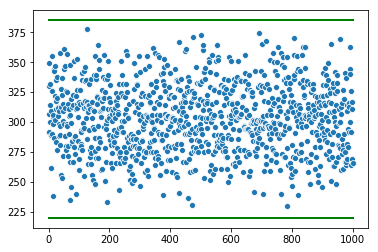

In [65]:
simulated_sums = []
x = np.arange(1,11)
y = np.arange(1,11)
for sim in range(1000):
    npr.shuffle(x)
    npr.shuffle(y)
    sum_xy = (x*y).sum()
    simulated_sums.append(sum_xy.sum())
    
sns.scatterplot(x=np.arange(1000), y=simulated_sums)
plt.plot([0, 1000], [385, 385], linewidth=2, color='green')
plt.plot([0, 1000], [220, 220], linewidth=2, color='green')
plt.show()
display(Caption(3.0, "1000 random values of the sum of x*y showing they always fall between these max and min values (green)"))

The above graph shows 1000 computer simulations. I convinced my computer to randomly order the numbers 1 to 10 for X, and randomly order the numbers 1 to 10 for Y. Then, I multiplied X and Y, and added the products together. I did this 1000 times. The dots show the sum of the products for each simulation. The two black lines show the maximum possible sum (385), and the minimum possible sum (220), for this set of numbers. Notice, how all of the dots are in between the maximum and minimum possible values. Told you so.

"OK fine, you told me so...So what, who cares?". We've been looking for a way to summarize the co-variance between two measures right? Well, for these numbers, we have found one, haven't we. It's the sum of the products. We know that when the sum of the products is 385, we have found a perfect, positive correlation. We know, that when the sum of the products is 220, we have found a perfect negative correlation. What about the numbers in between. What could we conclude about the correlation if we found the sum of the products to be 350. Well, it's going to be positive, because it's close to 385, and that's perfectly positive. If the sum of the products was  240, that's going to be negative, because it's close to the perfectly negatively correlating 220. What about no correlation? Well, that's going to be in the middle between 220 and 385 right.

We have just come up with a data-specific summary measure for the correlation between the numbers 1 to 10 in X, and the numbers 1 to 10 in Y, it's the sum of the products. We know the maximum (385) and minimum values (220), so we can now interpret any product sum for this kind of data with respect to that scale.



Pro tip: When the correlation between two measures increases in the positive direction, the sum of their products increases to its maximum possible value. This is because the bigger numbers in X will tend to line up with the bigger numbers in Y, creating the biggest possible sum of products. When the correlation between two measures increases in the negative direction, the sum of their products decreases to its minimum possible value. This is because the bigger numbers in X will tend to line up with the smaller numbers in Y, creating the smallest possible sum of products. When there is no correlation, the big numbers in X will be randomly lined up with the big and small numbers in Y, making the sum of the products, somewhere in the middle.


### Co-variance, the measure

We took some time to see what happens when you multiply sets of numbers together. We found that $big*big = bigger$ and $small*small=\text{still small}$, and $big*small=\text{in the middle}$. The purpose of this was to give you some conceptual idea of how the co-variance between two measures is reflected in the sum of their products. We did something very straightforward. We just multiplied X with Y, and looked at how the product sums get big and small, as X and Y co-vary in different ways. 

Now, we can get a little bit more formal. In statistics, **co-variance** is not just the straight multiplication of values in X and Y. Instead, it's the multiplication of the deviations in X from the mean of X, and the deviation in Y from the mean of Y. Remember those difference scores from the mean we talked about last chapter? They're coming back to haunt you know, but in a good way like Casper the friendly ghost.

Let's see what this look like in a table:

In [54]:
subject=np.arange(1,11)
chocolate=np.round(subject*npr.uniform(0.5, 1, 10))
happiness=np.round(subject*npr.uniform(0.5, 1, 10))
cd = chocolate-chocolate.mean()
hd = happiness-happiness.mean()
df= pd.DataFrame({'subject': subject, 
                  'chocolate': chocolate, 
                  'happiness': happiness,
                  'C_d': cd,
                  'H_d': hd,
                  'C_d_x_H_d': cd*hd}).set_index('subject')

m,s = df.mean(), df.sum()
df.loc["Sums"] = s
df.loc["Means"] = m
df

,chocolate,happiness,C_d,H_d,C_d_x_H_d
subject,,,,,
1,1.0,1.0,-2.800000e+00,-3.200000e+00,8.96
2,1.0,1.0,-2.800000e+00,-3.200000e+00,8.96
3,2.0,2.0,-1.800000e+00,-2.200000e+00,3.96
4,3.0,2.0,-8.000000e-01,-2.200000e+00,1.76
5,4.0,5.0,2.000000e-01,8.000000e-01,0.16
6,3.0,3.0,-8.000000e-01,-1.200000e+00,0.96
7,4.0,4.0,2.000000e-01,-2.000000e-01,-0.04
8,5.0,6.0,1.200000e+00,1.800000e+00,2.16
9,7.0,9.0,3.200000e+00,4.800000e+00,15.36


We have computed the deviations from the mean for the chocolate scores (column `C_d`), and the deviations from the mean for the happiness scores (column `H_d`). Then, we multiplied them together (last column). Finally, you can see the mean of the products listed in the bottom right corner of the table, the official **the covariance**.

The formula for the co-variance is:

$cov(X,Y) = \frac{\sum_{i}^{n}(x_{i}-\bar{X})(y_{i}-\bar{Y})}{N}$

OK, so now we have a formal single number to calculate the relationship between two variables. This is great, it's what we've been looking for. However, there is a problem. Remember when we learned how to compute just the plain old **variance**. We looked at that number, and we didn't know what to make of it. It was squared, it wasn't in the same scale as the original data. So, we square rooted the **variance** to produce the **standard deviation**, which gave us a more interpretable number in the range of our data. The **co-variance** has a similar problem. When you calculate the co-variance as we just did, we don't know immediately know its scale. Is a 3 big? is a 6 big? is a 100 big? How big or small is this thing?

From our prelude discussion on the idea of co-variance, we learned the sum of products between two measures ranges between a maximum and minimum value. The same is true of the co-variance. For a given set of data, there is a maximum possible positive value for the co-variance (which occurs when there is perfect positive correlation). And, there is a minimum possible negative value for the co-variance (which occurs when there is a perfect negative correlation). When there is zero co-variation, guess what happens. Zeroes. So, at the very least, when we look at a co-variation statistic, we can see what direction it points, positive or negative. But, we don't know how big or small it is compared to the maximum or minimum possible value, so we don't know the relative size, which means we can't say how strong the correlation is. What to do?

### Pearson's r we there yet

Yes, we are here now. Wouldn't it be nice if we could force our measure of co-variation to be between -1 and +1? 

-1 would be the minimum possible value for a perfect negative correlation. +1 would be the maximum possible value for a perfect positive correlation. 0 would mean no correlation. Everything in between 0 and -1 would be increasingly large negative correlations. Everything between 0 and +1 would be increasingly large positive correlations. It would be a fantastic, sensible, easy to interpret system. If only we could force the co-variation number to be between -1 and 1. Fortunately, for us, this episode is brought to you by Pearson's $r$, which does precisely this wonderful thing.

Let's take a look at a formula for Pearson's $r$:

$r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}} = \frac{cov(X,Y)}{SD_{X}SD_{Y}}$

We see the symbol $\sigma$ here, that's more Greek for you. $\sigma$ is often used as a symbol for the standard deviation (SD). If we read out the formula in English, we see that r is the co-variance of X and Y, divided by the product of the standard deviation of X and the standard deviation of Y. Why are we dividing the co-variance by the product of the standard deviations. This operation has the effect of **normalizing** the co-variance into the range -1 to 1. 

<div class="marginnote">
But, we will fill this part in as soon as we can...promissory note to explain the magic. FYI, it's not magic. Brief explanation here is that dividing each measure by its standard deviation ensures that the values in each measure are in the same range as one another. 
</div>

For now, we will call this mathematical magic. It works, but we don't have space to tell you why it works right now.

> It's worth saying that there are loads of different formulas for computing Pearson's $r$. You can find them by Googling them. We will probably include more of them here, when we get around to it. However, they all give you the same answer. And, they are all not as pretty as each other. Some of them might even look scary. In other statistics textbook you will often find formulas that are easier to use for calculation purposes. For example, if you only had a pen and paper, you might use one or another formula because it helps you compute the answer faster by hand. To be honest, we are not very interested in teaching you how to plug numbers into formulas. We give one lesson on that here: Put the numbers into the letters, then compute the answer. Sorry to be snarky. Nowadays you have a computer that you should use for this kind of stuff. So, we are more interested in teaching you what the calculations mean, rather than how to do them. Of course, every week we are showing you how to do the calculations in lab with computers, because that is important to.

Does Pearson's $r$ really stay between -1 and 1 no matter what? It's true, take a look at the following simulation. Here I randomly ordered the numbers 1 to 10 for an X measure, and did the same for a Y measure. Then, I computed Pearson's $r$, and repeated this process 1000 times. As you can see all of the dots are between -1 and 1. Neat huh.

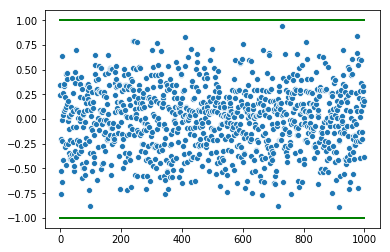

In [2]:
import scipy.stats as stats

simulated_rs = []
x = np.arange(1,11)
y = np.arange(1,11)
for sim in range(1000):
    npr.shuffle(x)
    npr.shuffle(y)
    r = stats.pearsonr(x,y)
    simulated_rs.append(r[0])
    
sns.scatterplot(x=np.arange(1000), y=simulated_rs)
plt.plot([0, 1000], [1, 1], linewidth=2, color='green')
plt.plot([0, 1000], [-1, -1], linewidth=2, color='green')
plt.show()
display(Caption(4.0, "A simulation of of correlations. Each dot represents the r-value for the correlation between an X and Y variable that each contain the numbers 1 to 10 in random orders. The figure ilustrates that many r-values can be obtained by this random process"))

## Examples with Data

In the lab for correlation you will be shown how to compute correlations in real data-sets using software. To give you a brief preview, let's look at some data from the [world happiness report](http://worldhappiness.report) (2018).

This report measured various attitudes across people from different countries. For example, one question asked about how much freedom people thought they had to make life choices. Another question asked how confident people were in their national government. Here is a scatterplot showing the relationship between these two measures. Each dot represents means for different countries.

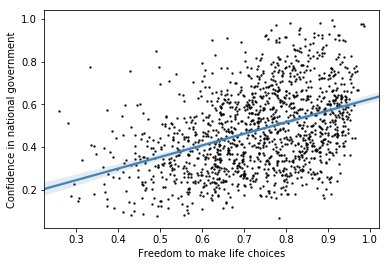

In [96]:
whr_df = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/WHR2018.csv', sep = ',', header='infer')
smaller_df = whr_df[['country','Freedom to make life choices', 'Confidence in national government']].dropna()
sns.regplot(x='Freedom to make life choices', y='Confidence in national government', line_kws={'color':'steelblue'}, scatter_kws={'s': 2, 'color': 'black'}, data=smaller_df)
plt.show()
display(Caption(5.0, "Relationship between freedom to make life choices and confidence in national government. Data from the world happiness report for 2018"))

We put a blue line on the scatterplot to summarize the positive relationship. It appears that as "freedom to make life choices goes up", so to does confidence in national government. It's a positive correlation.

The actual correlation, as measured by Pearson's $r$ is:

In [108]:
(r,p)=stats.pearsonr(smaller_df['Freedom to make life choices'],smaller_df['Confidence in national government'])
print(f"r = {np.round(r,4)}, p={np.round(p,4)}")

r = 0.4081, p=0.0


You will do a lot more of this kind of thing in the lab. Looking at the graph you might start to wonder: Does freedom to make life choices cause changes how confident people are in their national government? Our does it work the other way? Does being confident in your national government give you a greater sense of freedom to make life choices? Or, is this just a random relationship that doesn't mean anything? All good questions. These data do not provide the answers, they just suggest a possible relationship.

## Regression: A mini intro

We're going to spend the next little bit adding one more thing to our understanding of correlation. It's called **linear regression**. It sounds scary, and it really is. You'll find out much later in your Statistics education that everything we will be soon be talking about can be thought of as a special case of regression. But, we don't want to scare you off, so right now we just introduce the basic concepts.

First, let's look at a linear regression. This way we can see what we're trying to learn about. Here's some scatter plots, same one's you've already seen. But, we've added something new! Lines.

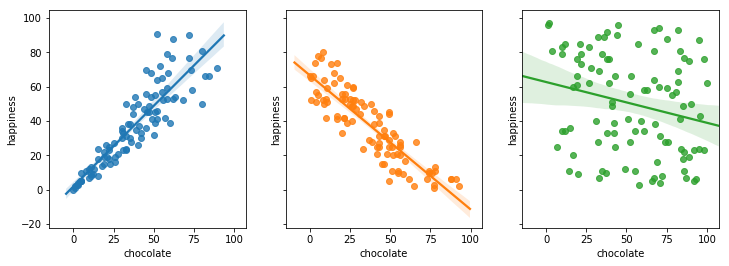

In [105]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4),sharex='all', sharey='all')
ax = axes.ravel()


subject=np.arange(100)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
df_CC_pos= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.regplot(x='chocolate', y='happiness', data=df_CC_pos,ax=ax[0])


subject=np.arange(100)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100,0,-1)*npr.uniform(0.5, 1, 100))
df_CC_neg= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.regplot(x='chocolate', y='happiness', data=df_CC_neg,ax=ax[1])


subject=np.arange(100)
chocolate=np.round(npr.uniform(0, 100, 100))
happiness=np.round(npr.uniform(0, 100, 100))
df_CC_zero= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.regplot(x='chocolate', y='happiness', data=df_CC_zero,ax=ax[2])

plt.show()
display(Caption(6.0, "Three scatterplots showing negative, positive, and a random correlation (where the r-value is expected to be 0), along with the best fit regression line"))

### The best fit line

Notice anything about these blue lines? Hopefully you can see, at least for the first two panels, that they go straight through the data, just like a kebab skewer. We call these lines **best fit** lines, because according to our definition (soon we promise) there are no other lines that you could draw that would do a better job of going straight throw the data.

One big idea here is that we are using the line as a kind of mean to describe the relationship between the two variables. When we only have one variable, that variable exists on a single dimension, it's 1D. So, it is appropriate that we only have one number, like the mean, to describe it's central tendency. When we have two variables, and plot them together, we now have a two-dimensional space. So, for two dimensions we could use a bigger thing that is 2d, like a line, to summarize the central tendency of the relationship between the two variables. 

What do we want out of our line? Well, if you had a pencil, and a printout of the data, you could draw all sorts of straight lines any way you wanted. Your lines wouldn't even have to go through the data, or they could slant through the data with all sorts of angles. Would all of those lines be very good a describing the general pattern of the dots? Most of them would not. The best lines would go through the data following the general shape of the dots. Of the best lines, however, which one is the best? How can we find out, and what do we mean by that? In short, the best fit line is the one that has the least error.


<div class="marginnote">
R code for plotting residuals thanks to Simon Jackson's blog post: [https://drsimonj.svbtle.com/visualising-residuals](https://drsimonj.svbtle.com/visualising-residuals)
</div>

Check out this next plot, it shows a line through some dots. But, it also shows some teeny tiny lines. These lines drop down from each dot, and they land on the line. Each of these little lines is called a **residual**. They show you how far off the line is for different dots. It's measure of error, it shows us just how wrong the line is. After all, it's pretty obvious that not all of the dots are on the line. This means the line does not actually represent all of the dots. The line is wrong. But, the best fit line is the least wrong of all the wrong lines.



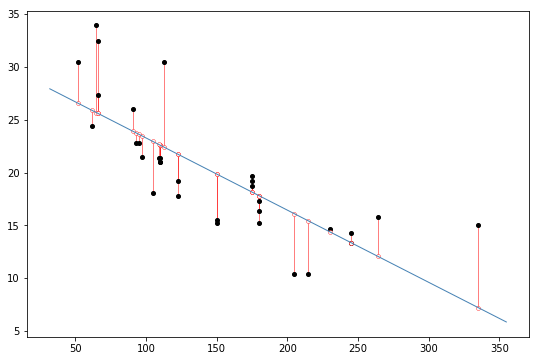

In [3]:
import statsmodels.formula.api as smf
import seaborn as sns

mtcars_df = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/mtcars.csv', sep = ',', header='infer')

# fit a linear regression to the mpg column given hp
lr = smf.ols(formula="mpg ~ hp", data=mtcars_df)
fit = lr.fit() # fit
params, pred, resid = fit.params, fit.fittedvalues, fit.resid
#display(fit.summary())

fig, ax = plt.subplots(figsize=(9,6))

x1 = np.linspace(mtcars_df.hp.min()-20, mtcars_df.hp.max()+20,400)
y1 = params['hp']*x1+params['Intercept']

ax.plot(mtcars_df.hp, mtcars_df.mpg,'ko',markersize=4)
ax.plot(mtcars_df.hp, mtcars_df.mpg-resid,'o',markersize=4,markeredgecolor='r', markeredgewidth=.4, markerfacecolor='white')


ax.plot(x1,y1,'-',color='steelblue',linewidth=1)

ax.vlines(mtcars_df.hp, mtcars_df.mpg, mtcars_df.mpg-resid,'r',linewidth=0.5)
plt.show()

display(Caption(7.0, "Black dots represent data points. The blue line is the best fit regression line. The white dots are repesent the predicted location of each black dot. The red lines show the error between each black dot and the regression line. The blue line is the best fit line because it minimizes the error shown by the red lines."))


There's a lot going on in this graph. First, we are looking at a scatter plot of two variables, an X and Y variable. Each of the black dots are the actual values from these variables. You can see there is a negative correlation here, as X increases, Y tends to decrease. We drew a regression line through the data, that's the blue line. There's these little white dots too. This is where the line thinks the black dots should be. The red lines are the important residuals we've been talking about. Each black dot has a red line that drops straight down, or straight up from the location of the black dot, and lands directly on the line. We can already see that many of the dots are not on the line, so we already know the line is "off" by some amount for each dot. The red line just makes it easier to see exactly how off the line is.

The important thing that is happening here, is that the the blue line is drawn is such a way, that it minimizes the total length of the red lines. For example, if we wanted to know how wrong this line was, we could simply gather up all the red lines, measure how long they are, and then add all the wrongness together. This would give us the total amount of wrongness. We usually call this the error. In fact, we've already talked about this idea before when we discussed standard deviation. What we will actually be doing with the red lines, is computing the sum of the squared deviations from the line. That sum is the total amount of error. Now, this blue line here minimizes the sum of the squared deviations. Any other line would produce a larger total error.


Here's an animation to see this in action. The animations compares the best fit line in blue, to some other possible lines in black. The black line moves up and down. The red lines show the error between the black line and the data points. As the black line moves toward the best fit line, the total error, depicted visually by the grey area shrinks to it's minimum value. The total error expands as the black line moves away from the best fit line.

In [176]:
display(HTML('<img src="../../images/gifs/regression-1.gif" alt="normal" width="550"/>'))
display(Caption(7.0, "The blue line is the best fit regression line explaining the co-variation among the black dots. The black line moves up and down showing alternative lines that could be drawn. The red lines show the amount of error between each data point and the black line. The total amount of error is depicted by the shaded grey area. The size of the grey area expands as the black line moves away from the best fit line, and shrinks to a minimum as the black line moves toward the best fit line."))

Whenever the black line does not overlap with the blue line, it is worse than the best fit line. The blue regression line is like Goldilocks, it's just right, and it's in the middle.

This next graph shows a little simulation of how the sum of squared deviations (the sum of the squared lengths of the red lines) behaves as we move the line up and down. What's going on here is that we are computing a measure of the total error as the black line moves through the best fit line. This represents the sum of the squared deviations. In other words, we square the length of each red line from the above animation, then we add up all of the squared red lines, and get the total error (the total sum of the squared deviations). The graph below shows what the total error looks like as the black line approaches then moves away from the best fit line. Notice, the dots in this graph start high on the left side, then they swoop down to a minimum at the bottom middle of the graph. When they reach their minimum point, we have found a line that minimizes the total error. This is the best fit regression line.

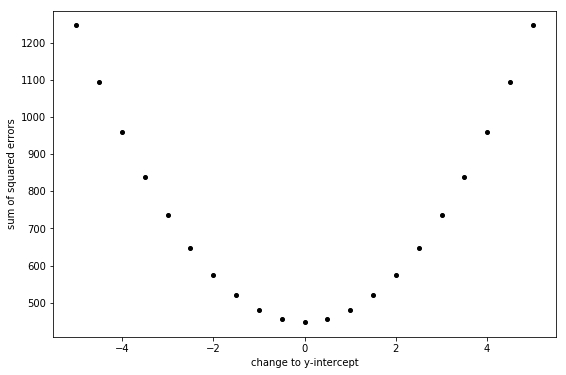

In [4]:
import statsmodels.formula.api as smf
import seaborn as sns

mtcars_df = pd.read_csv('http://gureckislab.org/courses/fall19/labincp/data/mtcars.csv', sep = ',', header='infer')

# fit a linear regression to the mpg column given hp
lr = smf.ols(formula="mpg ~ hp", data=mtcars_df)
fit = lr.fit() # fit
params, pred, resid = fit.params, fit.fittedvalues, fit.resid

x = mtcars_df.hp
total_error=[]
move_line = np.arange(-5,5.5,0.5)
for di in move_line:
    predicted_y = params['hp']*x + (params['Intercept']+di)
    error_y = (predicted_y-mtcars_df.mpg)**2
    total_error.append(error_y.sum())

fig, ax = plt.subplots(figsize=(9,6))

ax.plot(move_line, total_error, 'ko', markersize=4)
plt.xlabel('change to y-intercept')
plt.ylabel('sum of squared errors')


plt.show()

display(Caption(8.0, "A plot of the sum of the squared deviations for different lines moving up and down, through the best fit line. The best fit line occurs at the position that minimizes the sum of the sqaured deviations."))



OK, so we haven't talked about the y-intercept yet. But, what this graph shows us is how the total error behaves as we move the line up and down. The y-intercept here is the thing we change that makes our line move up and down. As you can see the dots go up when we move the line down from 0 to -5, and the dots go up when we move the line up from 0 to +5. The best line, that minimizes the error occurs right in the middle, when we don't move the blue regression line at all.

### Lines

OK, fine you say. So, there is one magic line that will go through the middle of the scatter plot and minimize the sum of the squared deviations. How do I find this magic line? We'll show you. But, to be completely honest, you'll almost never do it the way we'll show you here. Instead, it's much easier to use software and make your computer do it for. You'll learn how to that in the labs.

Before we show you how to find the regression line, it's worth refreshing your memory about how lines work, especially in 2 dimensions. Remember this?

$y = ax + b$, or also $y = mx + b$ (sometimes a or m is used for the slope)

This is the formula for a line. Another way of writing it is:

$y = slope * x + \text{y-intercept}$

The slope is the slant of the line, and the y-intercept is where the line crosses the y-axis. Let's look at some lines:

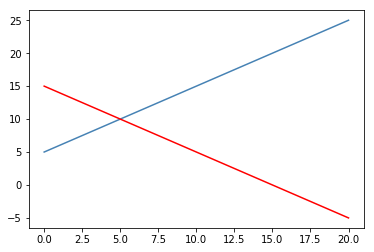

In [203]:
x = np.linspace(0,20,400)
y1 = 1*x+5
y2 = -1*x+15

plt.plot(x,y1,'-',color='steelblue')
plt.plot(x,y2,'-r')
plt.show()

display(Caption(9.0, "Two different lines with different y-intercepts (where the line crosses the y-axis), and different slopes. A positive slope makes the line go up from left to right. A negative slope makes the line go down from left to right."))



So there is two lines. The formula for the blue line is $y = 1*x + 5$. Let's talk about that. When x = 0, where is the blue line on the y-axis? It's at five. That happens because 1 times 0 is 0, and then we just have the five left over. How about when x = 5? In that case y =10. You just need the plug in the numbers to the formula, like this: 

$y = 1*x + 5$
$y = 1*5 + 5 = 5+5 =10$


The point of the formula is to tell you where y will be, for any number of x. The slope of the line tells you whether the line is going to go up or down, as you move from the left to the right. The blue line has a positive slope of one, so it goes up as x goes up. How much does it go up? It goes up by one for everyone one of x! If we made the slope a 2, it would be much steeper, and go up faster. The red line has a negative slope, so it slants down. This means $y$ goes down, as $x$ goes up. When there is no slant, and we want to make a perfectly flat line, we set the slope to 0. This means that y doesn't go anywhere as x gets bigger and smaller.

That's lines.

### Computing the best fit line

If you have a scatter plot showing the locations of scores from two variables, the real question is how can you find the slope and the y-intercept for the best fit line? What are you going to do? Draw millions of lines, add up the residuals, and then see which one was best? That would take forever. Fortunately, there are computers, and when you don't have one around, there's also some handy formulas.

<div class="marginnote">
It's worth pointing out just how much computers have changed everything. Before computers everyone had to do these calculations by hand, such a chore! Aside from the deeper mathematical ideas in the formulas, many of them were made for convenience, to speed up hand calculations, because there were no computers. Now that we have computers, the hand calculations are often just an exercise in algebra. Perhaps they build character. You decide.
</div>

We'll show you the formulas. And, work through one example by hand. It's the worst, we know. By the way, you should feel sorry for me as I do this entire thing by hand for you.

Here are two formulas we can use to calculate the slope and the intercept, straight from the data. We won't go into why these formulas do what they do. These ones are for "easy" calculation.

$intercept = b = \frac{\sum{y}\sum{x^2}-\sum{x}\sum{xy}}{n\sum{x^2}-(\sum{x})^2}$

$slope = m = \frac{n\sum{xy}-\sum{x}\sum{y}}{n\sum{x^2}-(\sum{x})^2}$

In these formulas, the $x$ and the $y$ refer to the individual scores. Here's a table showing you how everything fits together.

In [212]:
scores=np.array([1,2,3,4,5,6,7])
x = np.array([1,4,3,6,5,7,8])
y = np.array([2,5,1,8,6,8,9])
x_squared = x**2
y_squared = y**2
xy = x*y
all_df = pd.DataFrame({"scores": scores, 
                       "x":x,
                       "y":y,
                       "x_squared":x_squared,
                       "y_squared":y_squared,
                       "xy":xy}).set_index('scores')

m,s = all_df.mean(), all_df.sum()
all_df.loc["Sums"] = s
all_df

,x,y,x_squared,y_squared,xy
scores,,,,,
1,1,2,1,4,2
2,4,5,16,25,20
3,3,1,9,1,3
4,6,8,36,64,48
5,5,6,25,36,30
6,7,8,49,64,56
7,8,9,64,81,72
Sums,34,39,200,275,231


We see 7 sets of scores for the x and y variable. We calculated $x^2$ by squaring each value of x, and putting it in a column. We calculated $y^2$ by squaring each value of y, and putting it in a column. Then we calculated $xy$, by multiplying each $x$ score with each $y$ score, and put that in a column. Then we added all the columns up, and put the sums at the bottom. These are all the number we need for the formulas to find the best fit line. Here's what the formulas look like when we put numbers in them:

$intercept = b = \frac{\sum{y}\sum{x^2}-\sum{x}\sum{xy}}{n\sum{x^2}-(\sum{x})^2} = \frac{39 * 200 - 34*231}{7*200-34^2} = -.221$

$slope = m = \frac{n\sum{xy}-\sum{x}\sum{y}}{n\sum{x^2}-(\sum{x})^2} = \frac{7*231-34*39}{7*275-34^2} = 1.19$

Great, now we can check our work, let's plot the scores in a scatter plot and draw a line through it with slope = 1.19, and a y-intercept of -.221. It should go through the middle of the dots.

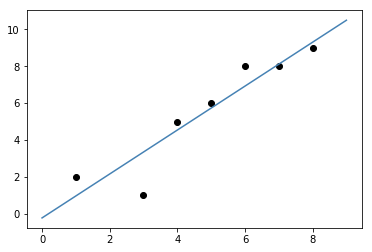

In [220]:
scores=np.array([1,2,3,4,5,6,7])
x = np.array([1,4,3,6,5,7,8])
y = np.array([2,5,1,8,6,8,9])
x_squared = x**2
y_squared = y**2
xy = x*y
all_df = pd.DataFrame({"scores": scores, 
                       "x":x,
                       "y":y,
                       "x_squared":x_squared,
                       "y_squared":y_squared,
                       "xy":xy}).set_index('scores')


x = np.linspace(0,9,500)
y_p = 1.19*x + -0.221
plt.plot(all_df.x, all_df.y,'ko')
plt.plot(x,y_p,'-',color='steelblue')
plt.show()


display(Caption(10.0, "An example regression line with confidence bands going through a few data points in a scatterplot"))

## Interpreting Correlations

What does the presence or the absence of a correlation between two measures mean? How should correlations be interpreted? What kind of inferences can be drawn from correlations? These are all very good questions. A first piece of advice is to use caution when interpreting correlations. Here's why.

### Correlation does not equal causation

Perhaps you have heard that correlation does not equal causation. Why not? There are lots of reasons why not. However, before listing some of the reasons let's start with a case where we would expect a causal connection between two measurements. Consider, buying a snake plant for your home. Snake plants are supposed to be easy to take care of because you can mostly ignore them.

Like most plants, snake plants need some water to stay alive. However, they also need just the right amount of water. Imagine an experiment where 1000 snake plants were grown in a house. Each snake plant is given a different amount of water per day, from zero teaspoons of water per day to 1000 teaspoons of water per day. We will assume that water is part of the causal process that allows snake plants to grow. The amount of water given to each snake plant per day can also be one of our measures. Imagine further that every week the experimenter measures snake plant growth, which will be the second measurement. Now, can you imagine for yourself what a scatter plot of weekly snake plant growth by tablespoons of water would look like?


#### Even when there is causation, there might not be obvious correlation

The first plant given no water at all would have a very hard time and eventually die. It should have the least amount of weekly growth. How about the plants given only a few teaspoons of water per day. This could be just enough water to keep the plants alive, so they will grow a little bit but not a lot. If you are imagining a scatter plot, with each dot being a snake plant, then you should imagine some dots starting in the bottom left hand corner (no water & no plant growth), moving up and to the right (a bit of water, and a bit of growth). As we look at snake plants getting more and more water, we should see more and more plant growth, right? "Sure, but only up to a point". Correct, there should be a trend for a positive correlation with increasing plant growth as amount of water per day increases. But, what happens when you give snake plants too much water? From personal experience, they die. So, at some point, the dots in the scatter plot will start moving back down again. Snake plants that get way too much water will not grow very well.

The imaginary scatter plot you should be envisioning could have an upside U shape. Going from left to right, the dot's go up, they reach a maximum, then they go down again reaching a minimum. Computing Pearson's $r$ for data like this can give you $r$ values close to zero. The scatter plot could look something like this:

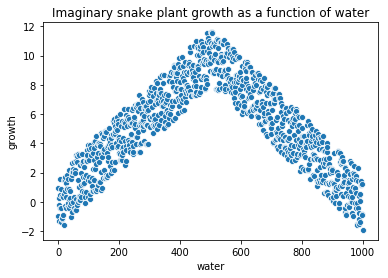

In [244]:
water = np.linspace(0,1000,1000)

growth=np.concatenate(
    (np.linspace(0,10,500), 
    np.linspace(10,0,500)),axis=None)

noise=npr.uniform(-2,2,1000)
growth = growth+noise

snake_df = pd.DataFrame({"growth": growth, "water": water})

sns.scatterplot('water','growth',data=snake_df)
plt.title('Imaginary snake plant growth as a function of water')
plt.show()

display(Caption(11.0, "Illustration of a possible relationship between amount of water and snake plant growth. Growth goes up with water, but eventually goes back down as too much water makes snake plants die."))

Granted this looks more like an inverted V, than an inverted U, but you get the picture right? There is clearly a relationship between watering and snake plant growth. But, the correlation isn't in one direction. As a result, when we compute the correlation in terms of Pearson's r, we get a value suggesting no relationship.

In [243]:
stats.pearsonr(snake_df.growth,snake_df.water)

(0.010099342861370503, 0.7497432286021619)

What this really means is there is no linear relationship that can be described by a single straight line. When we need lines or curves going in more than one direction, we have a nonlinear relationship.

This example illustrates some conundrums in interpreting correlations. We already know that water is needed for plants to grow, so we are rightly expecting there to be a relationship between our measure of amount of water and plant growth. If we look at the first half of the data we see a positive correlation, if we look at the last half of the data we see a negative correlation, and if we look at all of the data we see no correlation. Yikes. So, even when there is a causal connection between two measures, we won't necessarily obtain clear evidence of the connection just by computing a correlation coefficient. 

> Pro Tip: This is one reason why plotting your data is so important. If you see an upside U shape pattern, then a correlation analysis is probably not the best analysis for your data.

#### Confounding variable, or Third variable problem

Anybody can correlate any two things that can be quantified and measured. For example, we could find a hundred people, ask them all sorts of questions like:

  1. how happy are you
  2. how old are you
  3. how tall are you
  4. how much money do you make per year
  5. how long are your eyelashes
  6. how many books have you read in your life
  7. how loud is your inner voice
  
Let's say we found a positive correlation between yearly salary and happiness. Note, we could have just as easily computed the same correlation between happiness and yearly salary. If we found a correlation, would you be willing to infer that yearly salary causes happiness? Perhaps it does play a small part. But, something like happiness probably has a lot of contributing causes. Money could directly cause some people to be happy. But, more likely, money buys people access to all sorts of things, and some of those things might contribute happiness. These "other" things are called **third** variables. For example, perhaps people living in nicer places in more expensive houses are more happy than people in worse places in cheaper houses. In this scenario, money isn't causing happiness, it's the places and houses that money buys. But, even is this were true, people can still be more or less happy in lots of different situations.

The lesson here is that a correlation can occur between two measures because of a third variable that is not directly measured. So, just because we find a correlation, does not mean we can conclude anything about a causal connection between two measurements.

### Correlation and Random chance

Another very important aspect of correlations is the fact that they can be produced by random chance. This means that you can find a positive or negative correlation between two measures, even when they have absolutely nothing to do with one another. You might have hoped to find zero correlation when two measures are totally unrelated to each other. Although this certainly happens, unrelated measures can accidentally produce **spurious** correlations, just by chance alone. 

Let's demonstrate how correlations can occur by chance when there is no causal connection between two measures. Imagine two participants. One is at the North pole with a lottery machine full of balls with numbers from 1 to 10. The other is at the south pole with a different lottery machine full of balls with numbers from 1 to 10. There are an endless supply of balls in the machine, so every number could be picked for any ball. Each participant randomly chooses 10 balls, then records the number on the ball. In this situation we will assume that there is no possible way that balls chosen by the first participant could causally influence the balls chosen by the second participant. They are on the other side of the world. We should assume that the balls will be chosen by chance alone. 

Here is what the numbers on each ball could look like for each participant:

In [252]:
ball=np.arange(1,11,1)
north_pole = np.round(npr.uniform(1,10,10))
south_pole = np.round(npr.uniform(1,10,10))
the_df_balls = pd.DataFrame({'ball': ball, 'north_pole': north_pole, 'south_pole': south_pole})


r,p = stats.pearsonr(the_df_balls.north_pole, the_df_balls.south_pole)
the_df_balls

,ball,north_pole,south_pole
0,1,8.0,2.0
1,2,7.0,6.0
2,3,3.0,4.0
3,4,10.0,3.0
4,5,8.0,7.0
5,6,5.0,6.0
6,7,2.0,8.0
7,8,3.0,6.0
8,9,5.0,2.0
9,10,3.0,4.0


In this one case, if we computed Pearson's $r$, we would find that $r =$ {{ r }}. But, we already know that this value does not tell us anything about the relationship between the balls chosen in the north and south pole. We know that relationship should be completely random, because that is how we set up the game.

The better question here is to ask what can random chance do? For example, if we ran our game over and over again thousands of times, each time choosing new balls, and each time computing the correlation, what would we find?First, we will find fluctuation. The r value will sometimes be positive, sometimes be negative, sometimes be big and sometimes be small. Second, we will see what the fluctuation looks like. This will give us a window into the kinds of correlations that chance alone can produce. Let's see what happens.

#### Monte-carlo simulation of random correlations

It is possible to use a computer to simulate our game as many times as we want. This process is often termed **monte-carlo simulation**.

Below is a script written for the programming language R. We won't go into the details of the code here. However, let's briefly explain what is going on. Notice, the part that says ```for(sim in 1:1000) ```. This creates a loop that repeats our game 1000 times. Inside the loop there are variables named `North_pole` and `South_pole`. During each simulation, we sample 10 random numbers (between 1 to 10) into each variable. These random numbers stand for the numbers that would have been on the balls from the lottery machine. Once we have 10 random numbers for each, we then compute the correlation using `cor(North_pole,South_pole)`. Then, we save the correlation value and move on to the next simulation. At the end, we will have 1000 individual Pearson $r$ values.

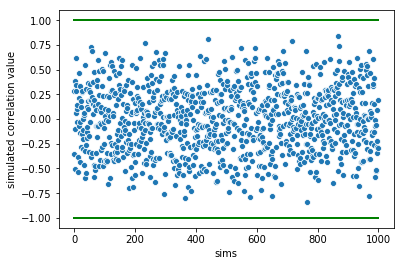

In [32]:
simulated_correlations = []
for sim in range(1000):
    north_pole = np.round(npr.uniform(1,10,10))
    south_pole = np.round(npr.uniform(1,10,10))
    r,p = stats.pearsonr(north_pole,south_pole)
    simulated_correlations.append(r)

sns.scatterplot(x=np.arange(1000), y=simulated_correlations)
plt.plot([0, 1000], [1, 1], linewidth=2, color='green')
plt.plot([0, 1000], [-1, -1], linewidth=2, color='green')
plt.xlabel('sims')
plt.ylabel('simulated correlation value')
plt.show()
display(Caption(12.0, "Another figure showing a range of r-values that can be obtained by chance."))

Let's take a look at all of the 1000 Pearson $r$ values. Does the figure below look familiar to you? It should, we have already conducted a similar kind of simulation before. Each dot in the scatter plot shows the Pearson $r$ for each simulation from 1 to 1000. As you can see the dots are all over of the place, in between the range -1 to 1. The important lesson here is that random chance produced all of these correlations. This means we can find "correlations" in the data that are completely meaningless, and do not reflect any causal relationship between one measure and another.

Let's illustrate the idea of finding "random" correlations one more time, with a little movie. This time, we will show you a scatter plot of the random values sampled for the balls chosen from the North and South pole. If there is no relationship we should see dots going everywhere. If there happens to be a positive relationship (purely by chance), we should see the dots going from the bottom left to the top right. If there happens to be a negative relationship (purely by chance), we should see the dots going from the top left down to the bottom right.

On more thing to prepare you for the movie. There are three scatter plots below, showing negative, positive, and zero correlations between two variables. You've already seen this graph before. We are just reminding you that the blue lines are helpful for seeing the correlation.Negative correlations occur when a line goes down from the top left to bottom right. Positive correlations occur when a line goes up from the bottom left to the top right. Zero correlations occur when the line is flat (doesn't go up or down).

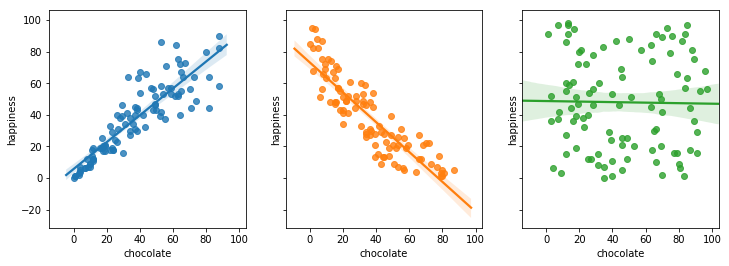

In [258]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4),sharex='all', sharey='all')
ax = axes.ravel()


subject=np.arange(100)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
df_CC_pos= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.regplot(x='chocolate', y='happiness', data=df_CC_pos,ax=ax[0])


subject=np.arange(100)
chocolate=np.round(np.arange(100)*npr.uniform(0.5, 1, 100))
happiness=np.round(np.arange(100,0,-1)*npr.uniform(0.5, 1, 100))
df_CC_neg= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.regplot(x='chocolate', y='happiness', data=df_CC_neg,ax=ax[1])


subject=np.arange(100)
chocolate=np.round(npr.uniform(0, 100, 100))
happiness=np.round(npr.uniform(0, 100, 100))
df_CC_zero= pd.DataFrame({'subject': subject, 'chocolate': chocolate, 'happiness': happiness})
sns.regplot(x='chocolate', y='happiness', data=df_CC_zero,ax=ax[2])

plt.show()
display(Caption(13.0, "A reminder of what positive, negative, and zero correlation looks like"))

OK, now we are ready for the movie. You are looking at the process of sampling two sets of numbers randomly, one for the X variable, and one for the Y variable. Each time we sample 10 numbers for each, plot them, then draw a line through them. Remember, these numbers are all completely random, so we should expect, on average that there should be no correlation between the numbers. However, this is not what happens. You can the line going all over the place. Sometimes we find a negative correlation (line goes down), sometimes we see a positive correlation (line goes up), and sometimes it looks like zero correlation (line is more flat).

In [41]:
%%capture
from celluloid import Camera

fig, axes = plt.subplots()
camera = Camera(fig)
for _ in range(50):
    north_pole = npr.uniform(1,10,10)
    south_pole = npr.uniform(1,10,10)
    sns.regplot(north_pole, south_pole, ci=None, ax=axes)
    plt.xlim([0,10])
    plt.ylim([0,10])
    camera.snap()

animation = camera.animate()


In [42]:
display(HTML(animation.to_html5_video()))
display(Caption(14.0, "Completely random data points drawn from a uniform distribution with a small sample-size of 10. The best fit regression line twirls around sometimes showing large correlations that are produced by chance"))

You might be thinking this is kind of disturbing. If we know that there should be no correlation between two random variables, how come we are finding correlations? This is a big problem right? I mean, if someone showed me a correlation between two things, and then claimed one thing was related to another, how could know I if it was true. After all, it could be chance! Chance can do that too.

Fortunately, all is not lost. We can look at our simulated data in another way, using a histogram. Remember, just before the movie, we simulated 1000 different correlations using random numbers. By, putting all of those $r$ values into a histogram, we can get a better sense of how chance behaves. We can see  what kind of correlations chance is likely or unlikely to produce. Here is a histogram of the simulated $r$ values.

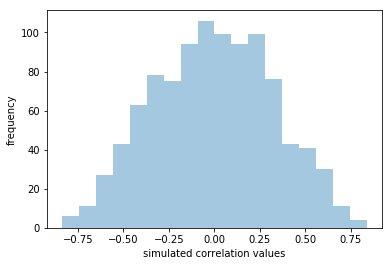

In [38]:
sns.distplot(simulated_correlations,kde=False)
plt.xlabel("simulated correlation values")
plt.ylabel("frequency")
plt.show()

display(Caption(15.0, "A histogram showing the frequency distribution of r-values for completely random values between an X and Y variable (sample-size=10). A rull range of r-values can be obtained by chance alone. Larger r-values are less common than smaller r-values"))


Notice that this histogram is not flat. Most of the simulated $r$ values are close to zero. Notice, also that the bars get smaller as you move away from zero in the positive or negative direction. The general take home here is that chance can produce a wide range of correlations. However, not all correlations happen very often. For example, the bars for -1 and 1 are very small. Chance does not produce nearly perfect correlations very often. The bars around -.5 and .5 are smaller than the bars around zero, as medium correlations do not occur as often as small correlations by chance alone.

You can think of this histogram as the window of chance. It shows what chance often does, and what it often does not do. If you found a correlation under these very same circumstances (e.g., measured the correlation between two sets of 10 random numbers), then you could consult this window. What should you ask the window? How about, could my observed correlation (the one that you found in your data) have come from this window. Let's say you found a correlation of $r = .1$. Could a .1 have come from the histogram? Well, look at the histogram around where the .1 mark on the x-axis is. Is there a big bar there? If so, this means that chance produces this value fairly often. You might be comfortable with the inference: Yes, this .1 could have been produced by chance, because it is well inside the window of chance. 
How about $r = .5$? The bar is much smaller here, you might think, "well, I can see that chance does produce .5 some times, so chance could have produced my .5. Did it? Maybe, maybe not, not sure". Here, your confidence in a strong inference about the role of chance might start getting a bit shakier. 

How about an $r = .95$?. You might see that the bar for .95 is very very small, perhaps too small to see. What does this tell you? It tells you that chance does not produce .95 very often, hardly if at all, pretty much never. So, if you found a .95 in your data, what would you infer? Perhaps you would be comfortable inferring that chance did not produce your .95, after .95 is mostly outside the window of chance.

#### Increasing sample-size decreases opportunity for spurious correlation

Before moving on, let's do one more thing with correlations. In our pretend lottery game, each participant only sampled 10 balls each. We found that this could lead to a range of correlations between the numbers randomly drawn from either sides of the pole. Indeed, we even found some correlations that were medium to large in size. If you were a researcher who found such correlations, you might be tempted to believe there was a relationship between your measurements. However, we know in our little game, that those correlations would be spurious, just a product of random sampling. 

The good news is that, as a researcher, you get to make the rules of the game. You get to determine how chance can play. This is all a little bit metaphorical, so let's make it concrete.

We will see what happens in four different scenarios. First, we will repeat what we already did. Each participant will draw 10 balls, then we compute the correlation, and do this over 1000 times and look at a histogram. Second, we will change the game so each participant draws 50 balls each, and then repeat our simulation. Third, and fourth, we will change the game so each participant draws 100 balls each, and then 1000 balls each, and repeat etc.

The graph below shows four different histograms of the Pearson $r$ values in each of the different scenarios. Each scenario involves a different sample-size, from, 10, 50, 100 to 1000.



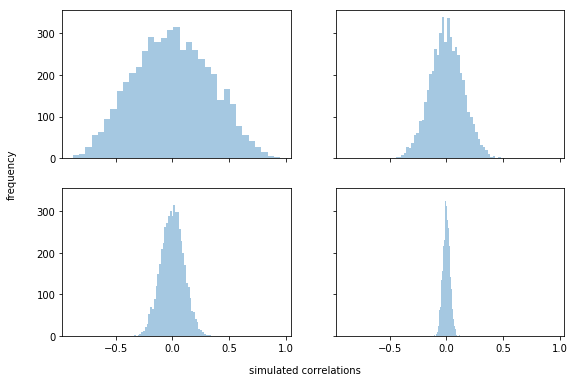

In [66]:

fig, axes = plt.subplots(2,2,figsize=(9,6),sharex='all', sharey='all')
ax = axes.ravel()

sample_size=[10, 50, 100, 1000]
for i in range(4):
    cors = []
    for _ in range(5000):
        north_pole = npr.uniform(1,10,sample_size[i])
        south_pole = npr.uniform(1,10,sample_size[i])
        r,p = stats.pearsonr(north_pole, south_pole)
        cors.append(r)
    sns.distplot(cors,kde=False,ax=ax[i])

fig.text(0.5, 0.04, 'simulated correlations', ha='center')
fig.text(0.04, 0.5, 'frequency', va='center', rotation='vertical')
plt.show()

display(Caption(16.0, "Four histograms showing the frequency distributions of r-values between completely random X and Y variables as a function of sample-size. The width of the distributions shrink as sample-size increases. Smaller sample-sizes are more likely to produce a wider range of r-values by chance. Larger sample-sizes always produce a narrow range of small r-values."))



By inspecting the four histograms you should notice a clear pattern. The width or range of each histogram shrinks as the sample-size increases. What is going on here? Well, we already know that we can think of these histograms as windows of chance. They tell us which $r$ values occur fairly often, which do not. When our sample-size is 10, lots of different $r$ values happen. That histogram is very flat and spread out. However, as the sample-size increases, we see that the window of chance gets pulled in. For example, by the time we get to 1000 balls each, almost all of the Pearson $r$ values are very close to 0.

One take home here, is that increasing sample-size narrows the window of chance. So, for example, if you ran a study involving 1000 samples of two measures, and you found a correlation of .5, then you can clearly see in the bottom right histogram that .5 does not occur very often by chance alone. In fact, there is no bar, because it didn't happen even once in the simulation. As a result, when you have a large sample size like n = 1000, you might be more confident that your observed correlation (say of .5) was not a spurious correlation. If chance is not producing your result, then something else is.

Finally, notice how your confidence about whether or not chance is mucking about with your results depends on your sample size. If you only obtained 10 samples per measurement, and found $r = .5$, you should not be as confident that your correlation reflects a real relationship. Instead, you can see that $r$'s of .5 happen fairly often by chance alone. 

> Pro tip: when you run an experiment you get to decide how many samples you will collect, which means you can choose to narrow the window of chance. Then, if you find a relationship in the data you can be more confident that your finding is real, and not just something that happened by chance.
### Some more movies

Let's ingrain these idea with some more movies. When our sample-size is small (N is small), sampling error can cause all sort "patterns" in the data. This makes it possible, and indeed common, for "correlations" to occur between two sets of numbers. When we increase the sample-size, sampling error is reduced, making it less possible for "correlations" to occur just by chance alone. When N is large,  chance has less of an opportunity to operate.

#### Watching how correlation behaves when there is no correlation

Below we randomly sample numbers for two variables, plot them, and show the correlation using a line. There are four panels, each showing the number of observations in the samples, from 10, 50, 100, to 1000 in each sample.

Remember, because we are randomly sampling numbers, there should be no relationship between the X and Y variables. But, as we have been discussing, because of chance, we can sometimes observe a correlation (due to chance). The important thing to watch is how the line behaves across the four panels. The line twirls around in all directions when the sample size is 10. It is also moves around quite a bit when the sample size is 50 or 100. It still moves a bit when the sample size is 1000, but much less. In all cases we expect that the line should be flat, but every time we take new samples, sometimes the line shows us pseudo patterns.

In [94]:
%%capture
from celluloid import Camera

fig, axes = plt.subplots(2, 2, figsize=(9,6),sharex='all', sharey='all')
ax = axes.ravel()
camera = Camera(fig)
fig.text(0.5, 0.04, 'simulated correlations', ha='center')
fig.text(0.04, 0.5, 'frequency', va='center', rotation='vertical')


sample_size=[10, 50, 100, 1000]

for _ in range(50):
    for i in range(4):
        north_pole = npr.uniform(1,10,sample_size[i])
        south_pole = npr.uniform(1,10,sample_size[i])
        sns.regplot(north_pole, south_pole, ci=None, ax=ax[i], scatter_kws={'s':0.8}, line_kws={'linewidth':0.7})
        ax[i].set_title("N="+str(sample_size[i]))
        plt.xlim([0,10])
        plt.ylim([0,10])
    camera.snap()

animation = camera.animate()


plt.show()




In [95]:
display(HTML(animation.to_html5_video()))
display(Caption(17.0, "Animation of how correlation behaves for completely random X and Y variables as a function of sample size. The best fit line is not very stable for small sample-sizes, but becomes more reliably flat as sample-size increases."))

Which line should you trust? Well, hopefully you can see that the line for 1000 samples is the most stable. It tends to be very flat every time, and it does not depend so much on the particular sample. The line with 10 observations per sample goes all over the place. The take home here, is that if someone told you that they found a correlation, you should want to know how many observations they hand in their sample. If they only had 10 observations, how could you trust the claim that there was a correlation? You can't!!! Not now that you know samples that are that small can do all sorts of things by chance alone. If instead, you found out the sample was very large, then you might trust that finding a little bit more. For example, in the above movie you can see that when there are 1000 samples, we never see a strong or weak correlation; the line is always flat. This is because chance almost never produces strong correlations when the sample size is very large. 

In the above example, we sampled numbers random numbers from a uniform distribution. Many examples of real-world data will come from a normal or approximately normal distribution. We can repeat the above, but sample random numbers from the same normal distribution. There will still be zero actual correlation between the X and Y variables, because everything is sampled randomly. But, we still see the same behavior as above. The computed correlation for small sample-sizes fluctuate wildly, and large sample sizes do not.

In [96]:
%%capture
from celluloid import Camera

fig, axes = plt.subplots(2, 2, figsize=(9,6),sharex='all', sharey='all')
ax = axes.ravel()
camera = Camera(fig)
fig.text(0.5, 0.04, 'simulated correlations', ha='center')
fig.text(0.04, 0.5, 'frequency', va='center', rotation='vertical')


sample_size=[10, 50, 100, 1000]

for _ in range(50):
    for i in range(4):
        north_pole = npr.randn(sample_size[i])
        south_pole = npr.randn(sample_size[i])
        sns.regplot(north_pole, south_pole, ci=None, ax=ax[i], scatter_kws={'s':0.8}, line_kws={'linewidth':0.7})
        ax[i].set_title("N="+str(sample_size[i]))
        plt.xlim([-5,5])
        plt.ylim([-5,5])
    camera.snap()

animation = camera.animate()


plt.show()

In [97]:
display(HTML(animation.to_html5_video()))
display(Caption(18.0, "Animation of correlation for random values sampled from a normal distribution, rather than a uniform distribution."))

OK, so what do things look like when there actually is a correlation between variables?

#### Watching correlations behave when there really is a correlation

Sometimes there really are correlations between two variables that are not caused by chance. Below, we get to watch a movie of four scatter plots. Each shows the correlation between two variables. Again, we change the sample-size in steps of 10, 50 100, and 1000. The data have been programmed to contain a real positive correlation. So, we should expect that the line will be going up from the bottom left to the top right. However, there is still variability in the data. So this time, sampling error due to chance will fuzz the correlation. We know it is there, but sometimes chance will cause the correlation to be eliminated.

Notice that in the top left panel (sample-size 10), the line is twirling around much more than the other panels. Every new set of samples produces different correlations. Sometimes, the line even goes flat or downward. However, as we increase sample-size, we can see that the line doesn't change very much, it is always going up showing a positive correlation.

In [107]:
%%capture
from celluloid import Camera

fig, axes = plt.subplots(2, 2, figsize=(9,6),sharex='all', sharey='all')
ax = axes.ravel()
camera = Camera(fig)
fig.text(0.5, 0.04, 'simulated correlations', ha='center')
fig.text(0.04, 0.5, 'frequency', va='center', rotation='vertical')


sample_size=[10, 50, 100, 1000]

for _ in range(50):
    for i in range(4):
        north_pole = npr.randn(sample_size[i])
        south_pole = north_pole+npr.normal(0,2,sample_size[i])
        sns.regplot(north_pole, south_pole, ci=None, ax=ax[i], scatter_kws={'s':0.8}, line_kws={'linewidth':0.7})
        ax[i].set_title("N="+str(sample_size[i]))
        plt.xlim([-5,5])
        plt.ylim([-5,5])
    camera.snap()

animation = camera.animate()


plt.show()

In [108]:
display(HTML(animation.to_html5_video()))
display(Caption(19.0, "How correlation behaves as a function of sample-size when there is a true correlation between X and Y variables."))

The main takeaway here is that even when there is a positive correlation between two things, you might not be able to see it if your sample size is small. For example, you might get unlucky with the one sample that you measured. Your sample could show a negative correlation, even when the actual correlation is positive! Unfortunately, in the real world we usually only have the sample that we collected, so we always have to wonder if we got lucky or unlucky. Fortunately, if you want to remove luck, all you need to do is collect larger samples. Then you will be much more likely to observe the real pattern, rather the pattern that can be introduced by chance.

## Summary

In this section we have talked about correlation, and started to build some intuitions about **inferential statistics**, which is the major topic of the remaining chapters. For now, the main ideas are:

1. We can measure relationships in data using things like correlation
2. The correlations we measure can be produced by numerous things, so they are hard to to interpret
3. Correlations can be produced by chance, so have the potential to be completely meaningless.
4. However, we can create a model of exactly what chance can do. The model tells us whether chance is more or less likely to produce correlations of different sizes
5. We can use the chance model to help us make decisions about our own data. We can compare the correlation we found in our data to the model, then ask whether or not chance could have or was likely to have produced our results.

